In [1]:
from sklearn.tree import DecisionTreeClassifier 
from sklearn.ensemble import RandomForestClassifier
from sklearn.datasets import load_wine

In [2]:
wine = load_wine()

In [5]:
wine.data.shape

(178, 13)

In [7]:
wine.target.shape

(178,)

In [9]:
from sklearn.model_selection import train_test_split

In [10]:
Xtrain,Xtest,Ytrain,Ytest = train_test_split(wine.data,wine.target,test_size=0.3)

In [16]:
clf = DecisionTreeClassifier(random_state=25)
clfr = RandomForestClassifier(random_state=25)

clf = clf.fit(Xtrain,Ytrain)
clfr = clfr.fit(Xtrain,Ytrain)

score_c = clf.score(Xtest,Ytest)
score_r = clfr.score(Xtest,Ytest)

print("Single : {}".format(score_c)
      ,"Random Forest : {}".format(score_r))

Single : 0.9259259259259259 Random Forest : 1.0


C:\ProgramData\Anaconda3\lib\site-packages\sklearn\ensemble\forest.py:246: FutureWarning: The default value of n_estimators will change from 10 in version 0.20 to 100 in 0.22.
  "10 in version 0.20 to 100 in 0.22.", FutureWarning)


C:\ProgramData\Anaconda3\lib\site-packages\sklearn\ensemble\forest.py:246: FutureWarning: The default value of n_estimators will change from 10 in version 0.20 to 100 in 0.22.
  "10 in version 0.20 to 100 in 0.22.", FutureWarning)
C:\ProgramData\Anaconda3\lib\site-packages\sklearn\ensemble\forest.py:246: FutureWarning: The default value of n_estimators will change from 10 in version 0.20 to 100 in 0.22.
  "10 in version 0.20 to 100 in 0.22.", FutureWarning)
C:\ProgramData\Anaconda3\lib\site-packages\sklearn\ensemble\forest.py:246: FutureWarning: The default value of n_estimators will change from 10 in version 0.20 to 100 in 0.22.
  "10 in version 0.20 to 100 in 0.22.", FutureWarning)
C:\ProgramData\Anaconda3\lib\site-packages\sklearn\ensemble\forest.py:246: FutureWarning: The default value of n_estimators will change from 10 in version 0.20 to 100 in 0.22.
  "10 in version 0.20 to 100 in 0.22.", FutureWarning)
C:\ProgramData\Anaconda3\lib\site-packages\sklearn\ensemble\forest.py:246: F

1.0 1.0


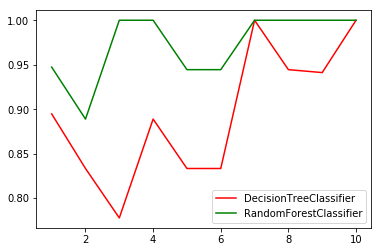

In [19]:
from sklearn.model_selection import cross_val_score
import matplotlib.pyplot as plt

clf = DecisionTreeClassifier(random_state=0)
clfr = RandomForestClassifier(random_state=0)

score_r = cross_val_score(clf,wine.data,wine.target,cv=10)
score_e = cross_val_score(clfr,wine.data,wine.target,cv=10)
print(max(score_r),max(score_e))
plt.figure()
plt.plot(range(1,11),score_r,color="red",label="DecisionTreeClassifier")
plt.plot(range(1,11),score_e,color="green",label="RandomForestClassifier")
plt.legend()
plt.show()

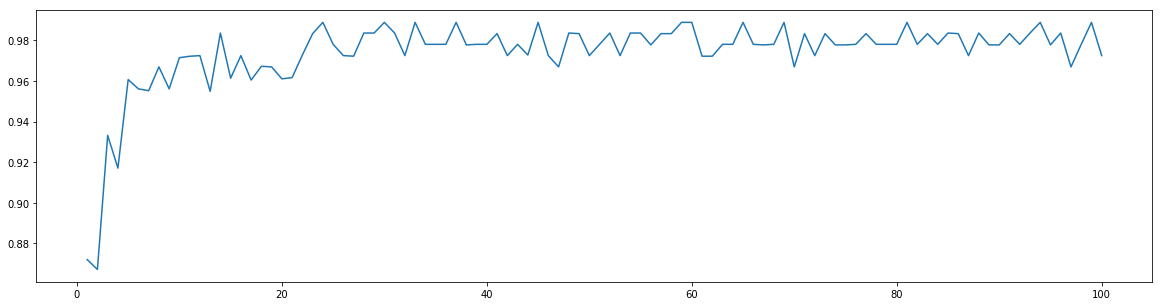

In [24]:
score_e = []
for i in range(100):
    clfr = RandomForestClassifier(n_estimators=i+1,n_jobs=-1)
    values = cross_val_score(clfr,wine.data,wine.target,cv=10).mean()
    score_e.append(values)
# print(max(values),values.index(max(values)))
plt.figure(figsize=(20,5))
plt.plot(range(1,101),score_e)
plt.show()

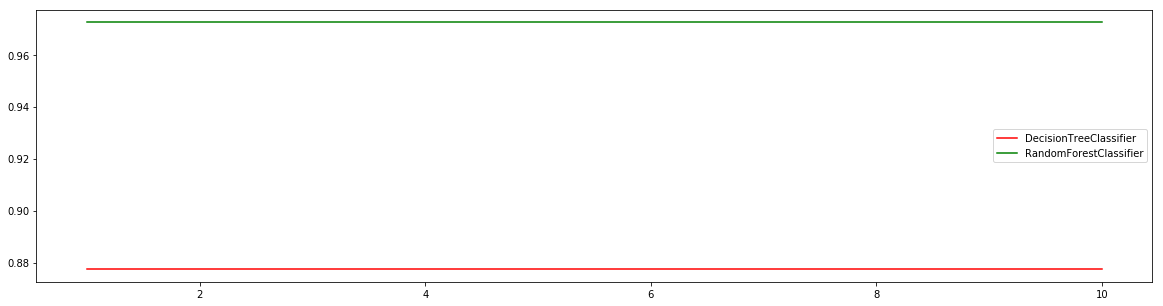

In [25]:
clf_1 = []
rfc_1 = []
for i in range(10):
    clf = DecisionTreeClassifier(random_state=30)
    value_clf = cross_val_score(clf,wine.data,wine.target,cv=10).mean()
    clf_1.append(value_clf)
    
    rfc = RandomForestClassifier(n_estimators=25,random_state=30)
    value_rfc = cross_val_score(rfc,wine.data,wine.target,cv=10).mean()
    rfc_1.append(value_rfc)
    
plt.figure(figsize=[20,5])
plt.plot(range(1,11),clf_1,color="red",label="DecisionTreeClassifier")
plt.plot(range(1,11),rfc_1,color="green",label="RandomForestClassifier")
plt.legend()
plt.show()

In [27]:
rfc = RandomForestClassifier(n_estimators=25,random_state=2)
rfc = rfc.fit(Xtrain,Ytrain)
rfc.estimators_[0]   # 查看森林中树的状况

DecisionTreeClassifier(class_weight=None, criterion='gini', max_depth=None,
            max_features='auto', max_leaf_nodes=None,
            min_impurity_decrease=0.0, min_impurity_split=None,
            min_samples_leaf=1, min_samples_split=2,
            min_weight_fraction_leaf=0.0, presort=False,
            random_state=1872583848, splitter='best')

In [31]:
for i in range(len(rfc.estimators_)):
    print(rfc.estimators_[i].random_state)

1872583848
794921487
111352301
1853453896
213298710
1922988331
1869695442
2081981515
1805465960
1376693511
1418777250
663257521
878959199
854108747
512264917
515183663
1287007039
2083814687
1146014426
570104212
520265852
1366773364
125164325
786090663
578016451


In [33]:
rfc = RandomForestClassifier(n_estimators=25,oob_score=True)
rfc = rfc.fit(wine.data,wine.target)
rfc.oob_score_

0.9550561797752809

In [35]:
rfc.feature_importances_  # 重要性权重

array([0.08084699, 0.02682913, 0.02175749, 0.05379655, 0.02427724,
       0.0453959 , 0.15116033, 0.00226352, 0.00792465, 0.20275054,
       0.12944665, 0.0971778 , 0.15637321])

In [36]:
rfc.apply(Xtest)  # 叶子节点的索引

array([[ 3,  9,  3, ..., 12,  3,  4],
       [ 3,  9,  3, ..., 12,  3,  4],
       [14, 21, 20, ..., 15, 16, 16],
       ...,
       [ 3,  9,  3, ..., 12,  3,  4],
       [11, 27,  1, ...,  1,  6,  9],
       [ 3,  9,  3, ..., 12,  3,  4]], dtype=int64)

In [37]:
rfc.score(Xtest,Ytest)

1.0

In [38]:
rfc.predict_proba(Xtest)

array([[0.  , 0.  , 1.  ],
       [0.  , 0.  , 1.  ],
       [1.  , 0.  , 0.  ],
       [1.  , 0.  , 0.  ],
       [0.04, 0.92, 0.04],
       [0.  , 0.  , 1.  ],
       [1.  , 0.  , 0.  ],
       [0.08, 0.92, 0.  ],
       [0.  , 0.  , 1.  ],
       [1.  , 0.  , 0.  ],
       [0.96, 0.04, 0.  ],
       [0.  , 0.84, 0.16],
       [1.  , 0.  , 0.  ],
       [1.  , 0.  , 0.  ],
       [0.  , 1.  , 0.  ],
       [0.  , 0.  , 1.  ],
       [0.96, 0.04, 0.  ],
       [0.96, 0.04, 0.  ],
       [0.  , 0.04, 0.96],
       [1.  , 0.  , 0.  ],
       [1.  , 0.  , 0.  ],
       [1.  , 0.  , 0.  ],
       [0.04, 0.  , 0.96],
       [0.  , 1.  , 0.  ],
       [1.  , 0.  , 0.  ],
       [0.  , 0.08, 0.92],
       [1.  , 0.  , 0.  ],
       [1.  , 0.  , 0.  ],
       [0.  , 0.72, 0.28],
       [1.  , 0.  , 0.  ],
       [0.  , 1.  , 0.  ],
       [0.  , 1.  , 0.  ],
       [0.08, 0.92, 0.  ],
       [0.  , 0.  , 1.  ],
       [0.04, 0.12, 0.84],
       [0.  , 1.  , 0.  ],
       [0.  , 0.  , 1.  ],
 

In [39]:
import numpy as np
from scipy.special import comb

np.array([comb(25,i)*(0.2**i)*((1-0.2)**(25-i)) for i in range(13,25)]).sum()

0.0003690480345558249

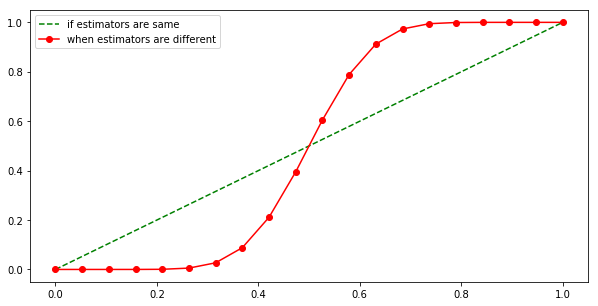

In [42]:
import matplotlib.pyplot as plt
import numpy as np
x = np.linspace(0,1,20)
y = []

for epsilon in np.linspace(0,1,20):
    E = np.array([comb(25,i)*(epsilon**i)*((1-epsilon)**(25-i)) for i in range(13,26)]).sum()
    y.append(E)
    
plt.figure(figsize=[10,5])
plt.plot(x,x,"--",color="green",label="if estimators are same")
plt.plot(x,y,"o-",color="red",label="when estimators are different")
plt.legend()
plt.show()

In [43]:
from sklearn.datasets import load_boston
from sklearn.model_selection import cross_val_score
from sklearn.ensemble import RandomForestRegressor

In [44]:
data = load_boston()

In [45]:
regressor = RandomForestRegressor(n_estimators=100,random_state=420)
cross_val_score(regressor,data.data,data.target,cv=10
               ,scoring="neg_mean_squared_error").mean()

-21.98996171294117

In [46]:
import sklearn

In [47]:
from sklearn.impute import SimpleImputer

In [48]:
dataset = load_boston()

In [49]:
dataset.data.shape

(506, 13)

In [50]:
X_full,y_full = dataset.data,dataset.target

In [51]:
n_samples = X_full.shape[0]   # 506
n_features = X_full.shape[1]   # 13

In [53]:
rng = np.random.RandomState(0)
missing_rate = 0.5
n_missing_samples = int(np.floor(n_samples*n_features*missing_rate))

In [54]:
missing_features = rng.randint(0,n_features,n_missing_samples)
missing_samples = rng.randint(0,n_samples,n_missing_samples)

In [55]:
x_missing = X_full.copy()
y_missing = y_full.copy()

In [56]:
x_missing[missing_samples,missing_features] = np.nan

In [57]:
import pandas as pd
x_missing = pd.DataFrame(x_missing)

In [59]:
x_missing.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 506 entries, 0 to 505
Data columns (total 13 columns):
0     306 non-null float64
1     305 non-null float64
2     306 non-null float64
3     303 non-null float64
4     304 non-null float64
5     305 non-null float64
6     321 non-null float64
7     309 non-null float64
8     310 non-null float64
9     309 non-null float64
10    302 non-null float64
11    292 non-null float64
12    317 non-null float64
dtypes: float64(13)
memory usage: 51.5 KB


In [27]:
import numpy as np
import pandas as pd
from sklearn.datasets import load_boston
import matplotlib.pyplot as plt
from sklearn.ensemble import RandomForestRegressor
from sklearn.impute import SimpleImputer

In [28]:
boston = load_boston()

In [29]:
boston.data.shape

(506, 13)

In [30]:
x_full,y_full = boston.data,boston.target

In [31]:
n_samples = x_full.shape[0]
n_features = x_full.shape[1]

In [32]:
rng = np.random.RandomState(30)
missing_rate = 0.5
n_missing_samples = int(np.float(n_samples * n_features * missing_rate))

In [33]:
missing_features = np.random.randint(0,n_features,n_missing_samples)
missing_samples = np.random.randint(0,n_samples,n_missing_samples)

In [34]:
x_missing = x_full.copy()
y_missing = y_full.copy()

In [37]:
x_missing[missing_samples,missing_features] = np.nan

In [38]:
pd.DataFrame(x_missing).head()

,0,1,2,3,4,5,6,7,8,9,10,11,12
0,NaN,18.0,2.31,NaN,NaN,6.575,65.2,NaN,1.0,296.0,15.3,NaN,4.98
1,NaN,0.0,7.07,NaN,0.469,NaN,78.9,4.9671,2.0,242.0,NaN,396.90,NaN
2,NaN,NaN,7.07,0.0,NaN,NaN,61.1,4.9671,NaN,242.0,17.8,392.83,4.03
3,NaN,0.0,2.18,NaN,0.458,6.998,NaN,6.0622,3.0,222.0,NaN,NaN,2.94
4,0.06905,0.0,2.18,NaN,0.458,7.147,54.2,6.0622,3.0,NaN,18.7,NaN,NaN


In [13]:
# 再来一遍
from sklearn.impute import SimpleImputer
from sklearn.datasets import load_boston
boston = load_boston()
x_full,y_full = boston.data,boston.target
n_samples = x_full.shape[0]
n_features = x_full.shape[1]

rng = np.random.RandomState(0)
missing_rate = 0.5
n_missing_samples = int(np.float(n_samples * n_features * missing_rate ))
missing_samples = np.random.randint(0,n_samples,n_missing_samples)
missing_features = np.random.randint(0,n_features,n_missing_samples)

x_missing = x_full.copy()
y_missing = y_full.copy()

x_missing[missing_samples,missing_features] = np.nan
pd.DataFrame(x_missing).head()

,0,1,2,3,4,5,6,7,8,9,10,11,12
0,NaN,NaN,NaN,0.0,NaN,6.575,65.2,4.0900,NaN,296.0,NaN,396.90,4.98
1,0.02731,NaN,7.07,NaN,NaN,6.421,78.9,4.9671,NaN,NaN,NaN,NaN,NaN
2,0.02729,0.0,NaN,0.0,0.469,NaN,61.1,4.9671,NaN,NaN,NaN,NaN,4.03
3,0.03237,NaN,2.18,0.0,NaN,NaN,NaN,NaN,NaN,NaN,18.7,394.63,2.94
4,0.06905,0.0,NaN,NaN,0.458,NaN,54.2,NaN,NaN,NaN,18.7,396.90,5.33


In [16]:
from sklearn.impute import SimpleImputer
imp_mean = SimpleImputer(missing_values=np.nan,strategy="mean")
x_missing_mean = imp_mean.fit_transform(x_missing)
pd.DataFrame(x_missing_mean).isnull().sum().sum()

0

In [17]:
from sklearn.impute import SimpleImputer
imp_0 = SimpleImputer(missing_values = np.nan,strategy = "constant",fill_value=0)
x_missing_0 = imp_0.fit_transform(x_missing)
pd.DataFrame(x_missing_0).head()

,0,1,2,3,4,5,6,7,8,9,10,11,12
0,0.00000,0.0,0.00,0.0,0.000,6.575,65.2,4.0900,0.0,296.0,0.0,396.90,4.98
1,0.02731,0.0,7.07,0.0,0.000,6.421,78.9,4.9671,0.0,0.0,0.0,0.00,0.00
2,0.02729,0.0,0.00,0.0,0.469,0.000,61.1,4.9671,0.0,0.0,0.0,0.00,4.03
3,0.03237,0.0,2.18,0.0,0.000,0.000,0.0,0.0000,0.0,0.0,18.7,394.63,2.94
4,0.06905,0.0,0.00,0.0,0.458,0.000,54.2,0.0000,0.0,0.0,18.7,396.90,5.33


用随机森林进行填补

In [39]:
x_missing_reg = x_missing.copy()

In [44]:
x_missing_reg = pd.DataFrame(x_missing_reg)

In [48]:
np.sort(x_missing_reg.isnull().sum(axis=0))   # 把缺失值从小到大排个序

array([183, 185, 188, 191, 193, 196, 198, 200, 201, 203, 208, 209, 219],
      dtype=int64)

In [57]:
sortindex = np.argsort(x_missing_reg.isnull().sum(axis=0)).values   # 返回缺失值从小到大排序的索引

In [58]:
sortindex

array([ 4, 10,  8, 11,  0,  5,  9,  1,  2,  7,  6, 12,  3], dtype=int64)

In [67]:
for i in sortindex:
    df = x_missing_reg
    fillc = df.iloc[:,i]   # 新标签
    df = np.concat([df.iloc[:,df.columns != i],pd.DataFrame(y_full)],axis=1) # 新特征
    # 新特征中对含有缺失值的列进行0填补
    df_0 = SimpleImputer(missing_values=np.nan,strategy="constant",fill_value=0).fit_transform(df)
    
    # 找出训练集和测试集
    Ytrain = fillc[fillc.notnull()]
    Xtrain = df_0[Ytrain.index,:]
    Ytest = fillc[fillc.isnull()]
    Xtest = df_0[Ytest.index,:]
    
    # 用随机森林进行填补
    rfc = RandomForestRegressor(n_estimators=100)
    rfc = rfc.fit_transform(Xtrain,Ytrain)
    Ypredict = rfc.predict(Xtest)
    
    x_missing_reg.loc[x_missing_reg.iloc[:,i].isnull(),i] = Ypredict

AttributeError: module 'numpy' has no attribute 'concat'

In [71]:
# # 对填充好的模型进行建模
# from sklearn.model_selection import cross_val_score as CVS
# mse = []
# X = [x_full,x_missing_mean,x_missing_0,x_missing_reg]
# for x in X:
#     estimator = RandomForestRegressor(random_state=0,n_estimators=100)
#     score = CVS(estimator,x,y_full,cv=10,scoring="neg_mean_squared_error").mean()
#     mse.append(score * -1)

In [ ]:
[*zip(["x_full","x_missing_0","x_missing_mean","x_missing_reg"],mse)]

调参实例

In [72]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.datasets import load_breast_cancer
from sklearn.ensemble import RandomForestRegressor
from sklearn.model_selection import cross_val_score
from sklearn.model_selection import GridSearchCV

In [73]:
data = load_breast_cancer()

In [75]:
rfc = RandomForestRegressor(random_state=90,n_estimators=100)
score_pre = cross_val_score(rfc,data.data,data.target,cv=10).mean()
score_pre

0.8246234819217253

0.8222748784955913 0.8222748784955913


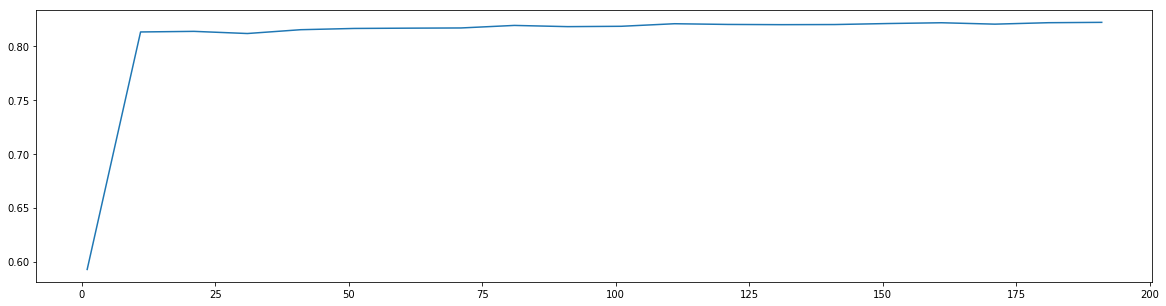

In [76]:
scorel = []
for i in range(0,200,10):
    rfc = RandomForestRegressor(random_state=0,n_estimators=i+1,n_jobs=-1)
    score = cross_val_score(rfc,data.data,data.target,cv=10).mean()
    scorel.append(score)
print(scorel[scorel.index(max(scorel))],max(scorel))
plt.figure(figsize=[20,5])
plt.plot(range(1,201,10),scorel)
plt.show()

In [77]:
# 调整 max_depth
param_grid = {"max_depth":np.arange(1,20,1)}

rfc = RandomForestRegressor(n_estimators=44,random_state=90)
GS = GridSearchCV(rfc,param_grid,cv=10)
GS.fit(data.data,data.target)

C:\ProgramData\Anaconda3\lib\site-packages\sklearn\model_selection\_search.py:841: DeprecationWarning: The default of the `iid` parameter will change from True to False in version 0.22 and will be removed in 0.24. This will change numeric results when test-set sizes are unequal.
  DeprecationWarning)


GridSearchCV(cv=10, error_score='raise-deprecating',
       estimator=RandomForestRegressor(bootstrap=True, criterion='mse', max_depth=None,
           max_features='auto', max_leaf_nodes=None,
           min_impurity_decrease=0.0, min_impurity_split=None,
           min_samples_leaf=1, min_samples_split=2,
           min_weight_fraction_leaf=0.0, n_estimators=44, n_jobs=None,
           oob_score=False, random_state=90, verbose=0, warm_start=False),
       fit_params=None, iid='warn', n_jobs=None,
       param_grid={'max_depth': array([ 1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11, 12, 13, 14, 15, 16, 17,
       18, 19])},
       pre_dispatch='2*n_jobs', refit=True, return_train_score='warn',
       scoring=None, verbose=0)

In [78]:
GS.best_params_

{'max_depth': 6}

In [80]:
GS.best_score_

0.8268185142144953